<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_csv = '../project-two/sat_scores.csv'

## Reviewing the data 

In [3]:
with open('../project-two/sat_scores.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print row

{'Math': '510', 'State': 'CT', 'Rate': '82', 'Verbal': '509'}
{'Math': '513', 'State': 'NJ', 'Rate': '81', 'Verbal': '499'}
{'Math': '515', 'State': 'MA', 'Rate': '79', 'Verbal': '511'}
{'Math': '505', 'State': 'NY', 'Rate': '77', 'Verbal': '495'}
{'Math': '516', 'State': 'NH', 'Rate': '72', 'Verbal': '520'}
{'Math': '499', 'State': 'RI', 'Rate': '71', 'Verbal': '501'}
{'Math': '499', 'State': 'PA', 'Rate': '71', 'Verbal': '500'}
{'Math': '506', 'State': 'VT', 'Rate': '69', 'Verbal': '511'}
{'Math': '500', 'State': 'ME', 'Rate': '69', 'Verbal': '506'}
{'Math': '501', 'State': 'VA', 'Rate': '68', 'Verbal': '510'}
{'Math': '499', 'State': 'DE', 'Rate': '67', 'Verbal': '501'}
{'Math': '510', 'State': 'MD', 'Rate': '65', 'Verbal': '508'}
{'Math': '499', 'State': 'NC', 'Rate': '65', 'Verbal': '493'}
{'Math': '489', 'State': 'GA', 'Rate': '63', 'Verbal': '491'}
{'Math': '501', 'State': 'IN', 'Rate': '60', 'Verbal': '499'}
{'Math': '488', 'State': 'SC', 'Rate': '57', 'Verbal': '486'}
{'Math':

## Mapping the column headings to a list of values for that column

In [4]:
reader = csv.DictReader(open(sat_csv))

sat_scores = {}
for row in reader:
    for key, value in row.iteritems():
        sat_scores.setdefault(key, []).append(value)
print sat_scores

{'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566', '506'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4'

The setdefault() returns:

value of the key if it is in the dictionary
None if key is not in the dictionary and default_value is not specified
default_value if key is not in the dictionary and default_value is specified

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

### Loading with pandas.read_csv()

In [8]:
pandas_func_satscores = pd.read_csv(sat_csv)

print pandas_func_satscores.head()
print pandas_func_satscores.dtypes

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


### Create a pandas DataFrame with the SAT dictionary

In [9]:
pandas_df_satscores = pd.DataFrame(sat_scores)

print pandas_df_satscores.head()
print pandas_df_satscores.dtypes

  Math Rate State Verbal
0  510   82    CT    509
1  513   81    NJ    499
2  515   79    MA    511
3  505   77    NY    495
4  516   72    NH    520
Math      object
Rate      object
State     object
Verbal    object
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [11]:
pandas_func_satscores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


The data shows the average SAT Verbal and Math scores as well as the participation rates of each state.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

### Hard code to form a data dictionary

In [8]:
data_dict = {}
data_dict['State'] = ['Str', 'Each of 50 states in US']
data_dict['Rate'] = ['Int', 'Participation rate of each state']
data_dict['Verbal'] = ['Int', 'Average SAT Verbal score of each state']
data_dict['Math'] = ['Int', 'Average SAT Math score of each state']
data_dict['dataset shape'] = [pandas_func_satscores.shape]

print data_dict

{'Math': ['Int', 'Average SAT Math score of each state'], 'State': ['Str', 'Each of 50 states in US'], 'Rate': ['Int', 'Participation rate of each state'], 'Verbal': ['Int', 'Average SAT Verbal score of each state'], 'dataset shape': [(52, 4)]}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [9]:
import seaborn as sns

### Distribution for Rate

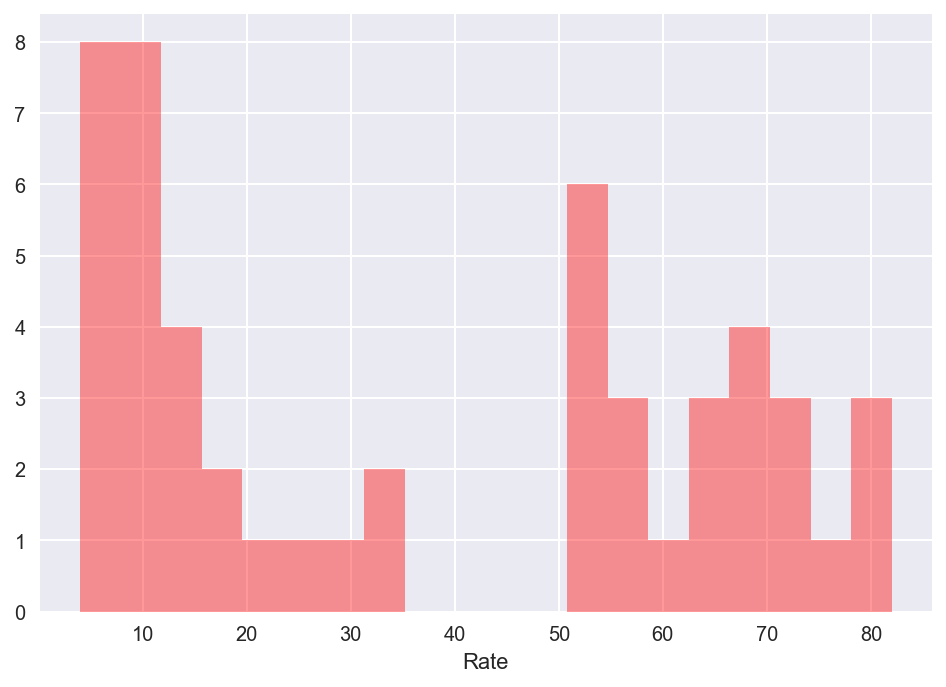

In [10]:
sns.distplot(pandas_func_satscores['Rate'][:-1], kde=False, color='r',bins=20)

### Distribution for Math

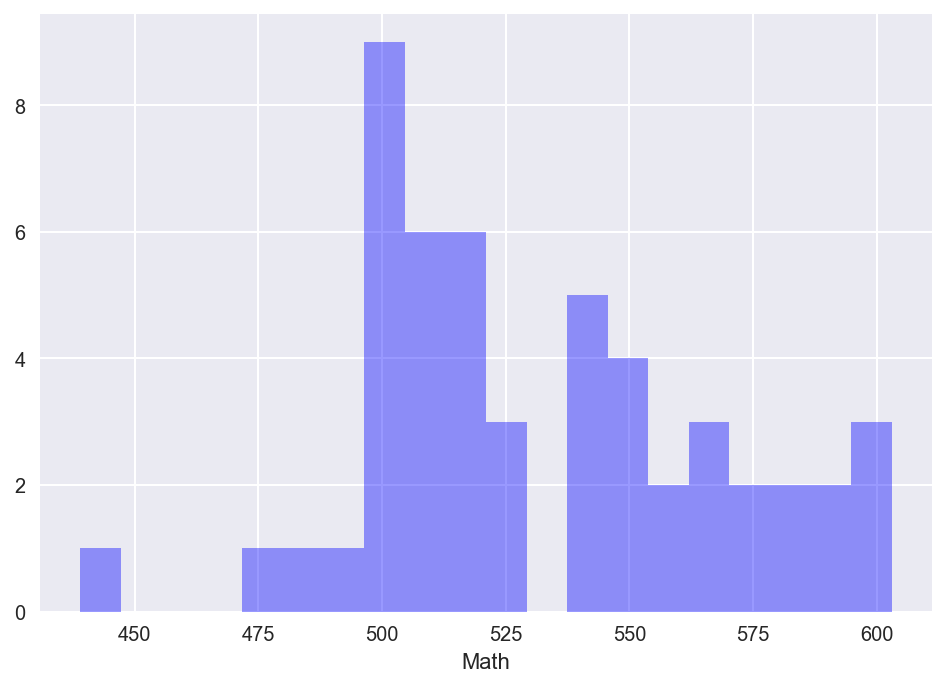

In [11]:
sns.distplot(pandas_func_satscores['Math'][:-1], kde=False, color='b', bins=20)

### Distribution for Verbal

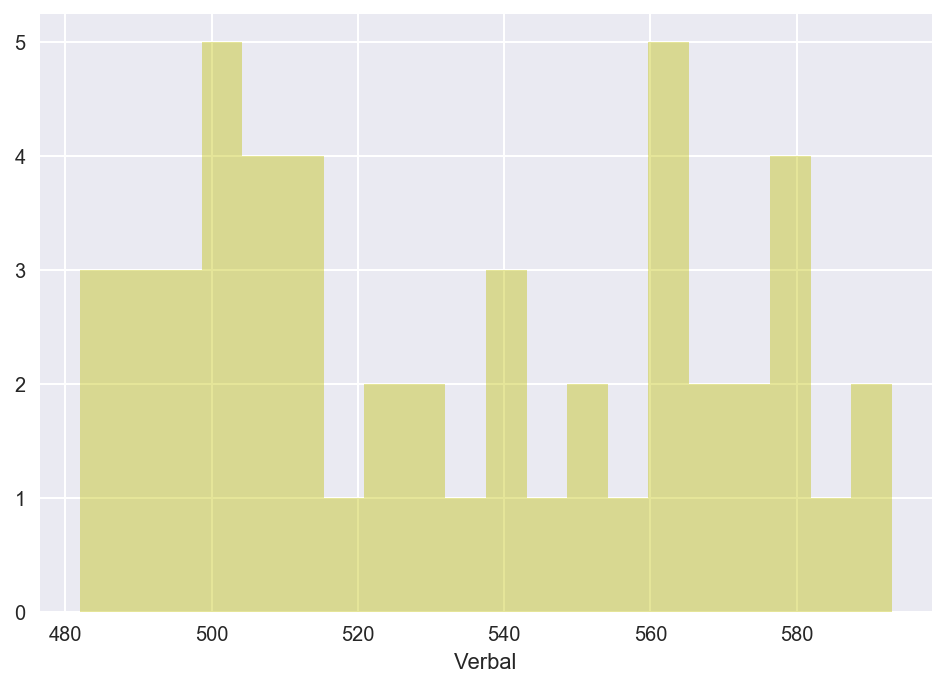

In [12]:
sns.distplot(pandas_func_satscores['Verbal'][:-1], kde=False, color='y', bins=20)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

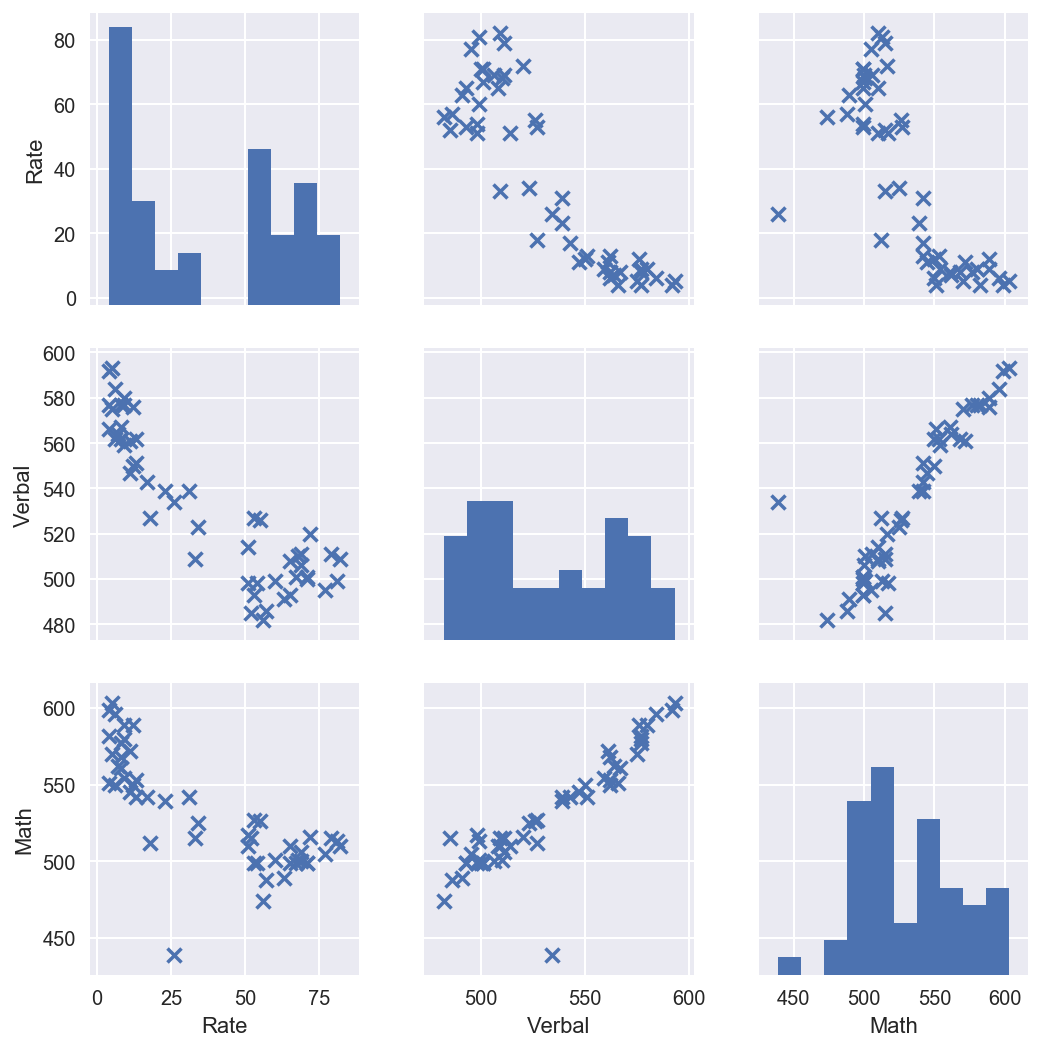

In [13]:
sns.pairplot(pandas_func_satscores[:-1],markers='x')

Math score and Verbal score are positively correlated.

Both Math and Verbal scores are inversely correlated with Rate which is normal as low participation rates in any state are usually contributed by top students which artifically higher the average scores.



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [14]:
verbal_math = pandas_func_satscores[['Verbal', 'Math']]

print verbal_math

    Verbal  Math
0      509   510
1      499   513
2      511   515
3      495   505
4      520   516
5      501   499
6      500   499
7      511   506
8      506   500
9      510   501
10     501   499
11     508   510
12     493   499
13     491   489
14     499   501
15     486   488
16     482   474
17     526   526
18     498   499
19     527   527
20     493   499
21     485   515
22     514   510
23     498   517
24     523   525
25     509   515
26     539   542
27     534   439
28     539   539
29     527   512
30     543   542
31     562   553
32     551   542
33     576   589
34     550   550
35     547   545
36     561   572
37     580   589
38     577   580
39     559   554
40     562   568
41     567   561
42     577   577
43     564   562
44     584   596
45     562   550
46     575   570
47     593   603
48     577   582
49     592   599
50     566   551
51     506   514


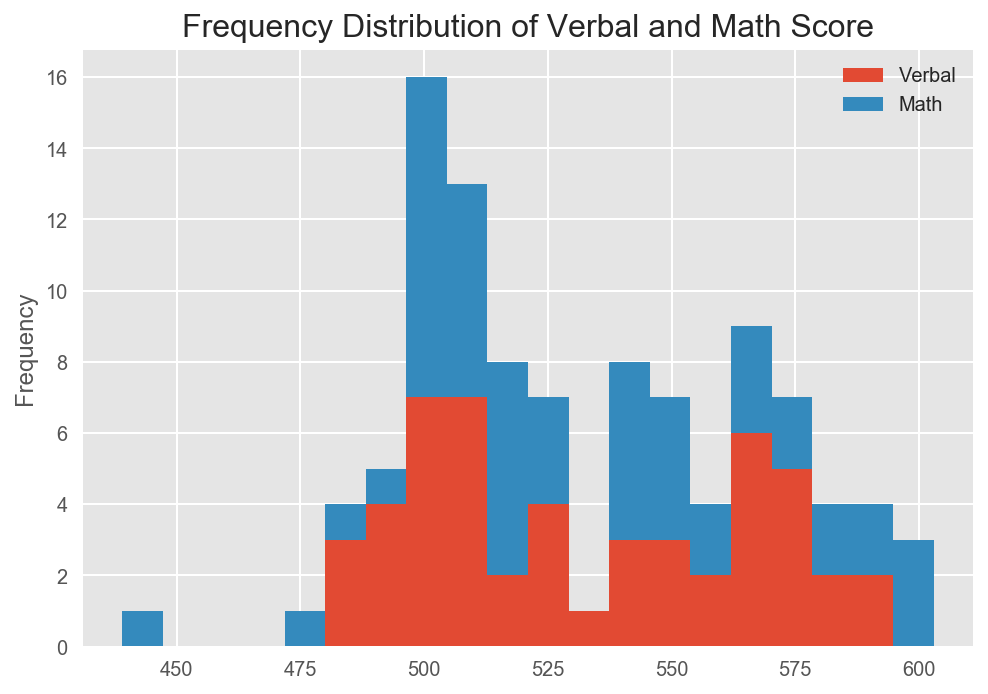

In [15]:
import matplotlib
matplotlib.style.use('ggplot')
vmh = verbal_math[:-1].plot.hist(stacked=True, bins=20)
vmh.set_title('Frequency Distribution of Verbal and Math Score', fontsize=16)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

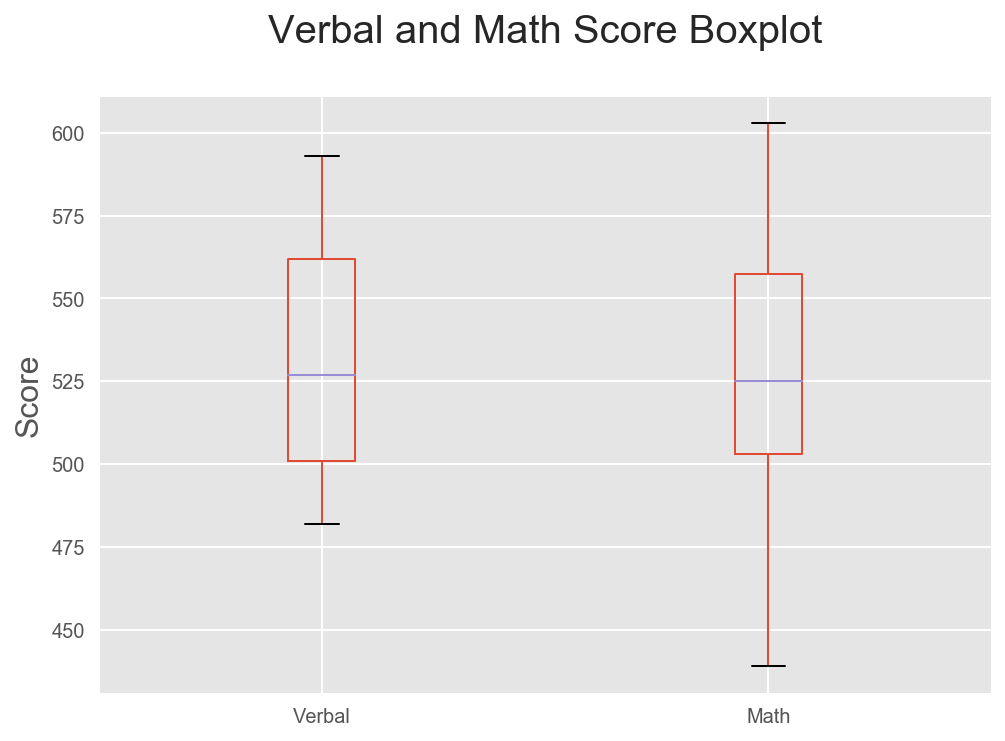

In [16]:
vm = verbal_math[:-1].plot.box()

vm.set_ylabel('Score', fontsize=16)
vm.set_title('Verbal and Math Score Boxplot\n', fontsize=20)

Histograms show the shape of the distribution while boxplots show the center (median), spread (quartiles, max&min) and any outliers.
Boxplots also clearly show where the distributions lie with regards to one and another.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


### Boxplot of standardized rate, verbal and math

In [62]:
nostate = pandas_func_satscores[['Rate', 'Verbal', 'Math']]

In [63]:
nostate_stand = (nostate - nostate.mean()) / nostate.std()

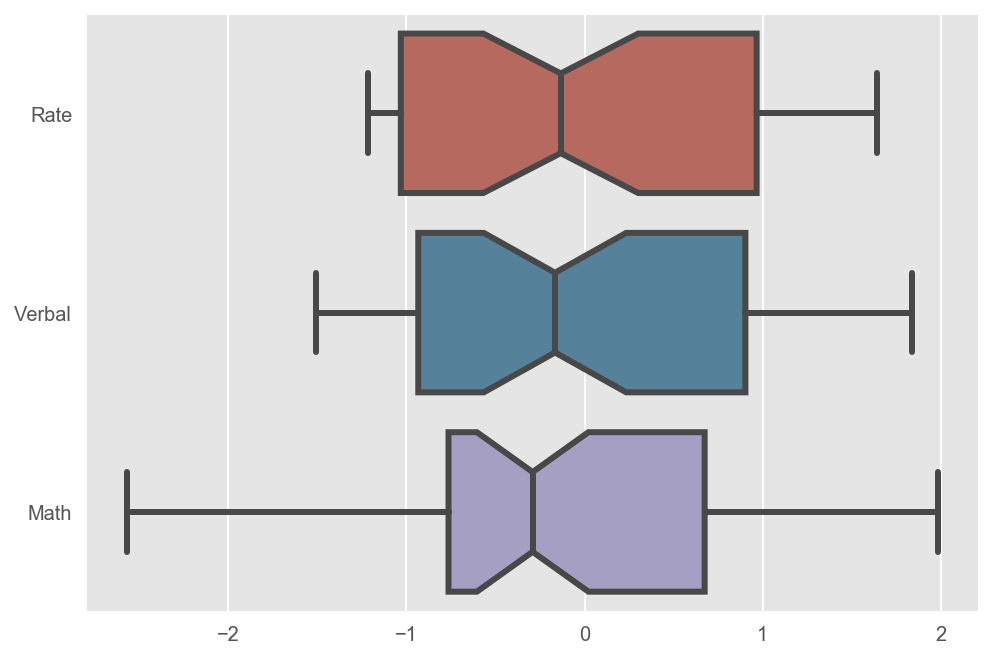

In [67]:
ax = sns.boxplot(data=nostate_stand, orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5)

In [17]:
pand = pd.DataFrame(pandas_func_satscores).copy()
print pand

   State  Rate  Verbal  Math
0     CT    82     509   510
1     NJ    81     499   513
2     MA    79     511   515
3     NY    77     495   505
4     NH    72     520   516
5     RI    71     501   499
6     PA    71     500   499
7     VT    69     511   506
8     ME    69     506   500
9     VA    68     510   501
10    DE    67     501   499
11    MD    65     508   510
12    NC    65     493   499
13    GA    63     491   489
14    IN    60     499   501
15    SC    57     486   488
16    DC    56     482   474
17    OR    55     526   526
18    FL    54     498   499
19    WA    53     527   527
20    TX    53     493   499
21    HI    52     485   515
22    AK    51     514   510
23    CA    51     498   517
24    AZ    34     523   525
25    NV    33     509   515
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1189efcd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x119113c90>], dtype=object)

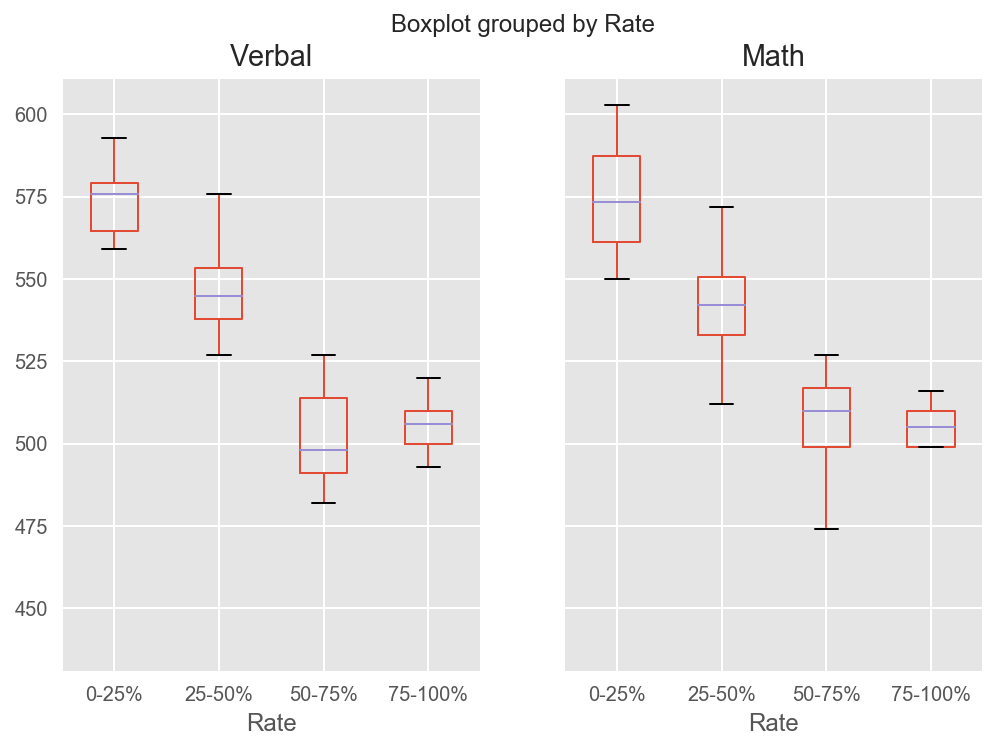

In [18]:
pand['Rate'] = pd.qcut(pand['Rate'], 4, labels=['0-25%', '25-50%', '50-75%', '75-100%'])
pand.boxplot(column=['Verbal', 'Math'], by='Rate')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [19]:
more_mean = pandas_func_satscores[pandas_func_satscores['Verbal']>pandas_func_satscores.iloc[-1, 2]]
print more_mean
more_mean.count()

   State  Rate  Verbal  Math
0     CT    82     509   510
2     MA    79     511   515
4     NH    72     520   516
7     VT    69     511   506
9     VA    68     510   501
11    MD    65     508   510
17    OR    55     526   526
19    WA    53     527   527
22    AK    51     514   510
24    AZ    34     523   525
25    NV    33     509   515
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4

State     36
Rate      36
Verbal    36
Math      36
dtype: int64

36 out of 50 states have Verbal scores higher than mean. Therefore, the distribution is negatively skewed.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [20]:
drop_all = pandas_func_satscores[pandas_func_satscores.State != 'All'].copy()

print drop_all

   State  Rate  Verbal  Math
0     CT    82     509   510
1     NJ    81     499   513
2     MA    79     511   515
3     NY    77     495   505
4     NH    72     520   516
5     RI    71     501   499
6     PA    71     500   499
7     VT    69     511   506
8     ME    69     506   500
9     VA    68     510   501
10    DE    67     501   499
11    MD    65     508   510
12    NC    65     493   499
13    GA    63     491   489
14    IN    60     499   501
15    SC    57     486   488
16    DC    56     482   474
17    OR    55     526   526
18    FL    54     498   499
19    WA    53     527   527
20    TX    53     493   499
21    HI    52     485   515
22    AK    51     514   510
23    CA    51     498   517
24    AZ    34     523   525
25    NV    33     509   515
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12

In [21]:
verbal_median = drop_all['Verbal'].median()

print verbal_median

more_median = pandas_func_satscores[pandas_func_satscores['Verbal']>verbal_median]

print more_median
print more_median.count()

527.0
   State  Rate  Verbal  Math
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551
State     24
Rate      24
Verbal    24
Math      24
dtype: int64


There are only 24 states with Verbal scores greater than the median. As the distribution of the Verbal scores are negatively skewed, the mean is lower than the median.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [95]:
drop_all['Verbal_Math'] = drop_all['Verbal'] - drop_all['Math']

drop_all

,State,Rate,Verbal,Math,Verbal_Math,Rate_percentile
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.039216
2,MA,79,511,515,-4,96.078431
3,NY,77,495,505,-10,94.117647
4,NH,72,520,516,4,92.156863
5,RI,71,501,499,2,89.215686
6,PA,71,500,499,1,89.215686
7,VT,69,511,506,5,85.294118
8,ME,69,506,500,6,85.294118
9,VA,68,510,501,9,82.352941


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [23]:
sorted_drop_all = drop_all.sort_values('Verbal_Math', ascending=False).copy()

verbal_greater = sorted_drop_all.head(10).copy()
verbal_greater.sort_values('Verbal_Math', ascending=False).head(3)

,State,Rate,Verbal,Math,Verbal_Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [24]:
math_greater = sorted_drop_all.tail(10).copy()
math_greater.sort_values('Verbal_Math', ascending=True).head(3)

,State,Rate,Verbal,Math,Verbal_Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [25]:

exclude_state = drop_all[['Rate', 'Verbal', 'Math']]

exclude_state.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.888121,-0.773419
Verbal,-0.888121,1.000000,0.899909
Math,-0.773419,0.899909,1.000000


Math score and Verbal score are positively correlated.

Both Math and Verbal scores are inversely correlated with Rate which is normal as low participation rates in any state are usually contributed by top students which artifically higher the average scores.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [26]:
pandas_func_satscores.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


count - number of rows in the DataFrame is 52

mean - average values of each column

std - standard deviation from the mean

min/max - lowest and highest value of each column

percentile - less than x% of the values fall under this value

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [27]:
exclude_state.cov()

,Rate,Verbal,Math
Rate,759.04,-816.280000,-773.220000
Verbal,-816.28,1112.934118,1089.404706
Math,-773.22,1089.404706,1316.774902


1. Covariance matrix is hard to interpret when variables have different units of measure. Correlation matrix is to get around this issue by standardizing the measures using z scores

2. cor(x ,y) = cov(x, y)/std(x)*std(y)

3. Correlation matrix is preferred when your data contain different units of measurement so as to give a standardized comparison.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [28]:
drug_csv = '../project-two/drug-use-by-age.csv'

In [29]:
drug_df = pd.read_csv(drug_csv)

print drug_df

      age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798          3.9                3.0            1.1   
1      13  2757          8.5                6.0            3.4   
2      14  2792         18.1                5.0            8.7   
3      15  2956         29.2                6.0           14.5   
4      16  3058         40.1               10.0           22.5   
5      17  3038         49.3               13.0           28.0   
6      18  2469         58.7               24.0           33.7   
7      19  2223         64.6               36.0           33.4   
8      20  2271         69.7               48.0           34.0   
9      21  2354         83.2               52.0           33.0   
10  22-23  4707         84.2               52.0           28.4   
11  24-25  4591         83.1               52.0           24.9   
12  26-29  2628         80.7               52.0           20.8   
13  30-34  2864         77.5               52.0           16.4   
14  35-49 

In [30]:
drug_df.replace('-',0 , inplace=True)
drug_df[['crack-frequency','cocaine-frequency','heroin-frequency','hallucinogen-frequency','inhalant-frequency','pain-releiver-frequency','oxycontin-frequency','tranquilizer-frequency','stimulant-frequency','meth-frequency','sedative-frequency']] = drug_df[['crack-frequency','cocaine-frequency','heroin-frequency','hallucinogen-frequency','inhalant-frequency','pain-releiver-frequency','oxycontin-frequency','tranquilizer-frequency','stimulant-frequency','meth-frequency','sedative-frequency']].apply(pd.to_numeric)

print drug_df

      age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798          3.9                3.0            1.1   
1      13  2757          8.5                6.0            3.4   
2      14  2792         18.1                5.0            8.7   
3      15  2956         29.2                6.0           14.5   
4      16  3058         40.1               10.0           22.5   
5      17  3038         49.3               13.0           28.0   
6      18  2469         58.7               24.0           33.7   
7      19  2223         64.6               36.0           33.4   
8      20  2271         69.7               48.0           34.0   
9      21  2354         83.2               52.0           33.0   
10  22-23  4707         84.2               52.0           28.4   
11  24-25  4591         83.1               52.0           24.9   
12  26-29  2628         80.7               52.0           20.8   
13  30-34  2864         77.5               52.0           16.4   
14  35-49 

In [31]:
drug_df.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

11 rows x 28 cols

sample size for each age grp, % of each age grp drug use and median number of times used in past 12 mths

no missing values. isnull.sum() all = zero

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

### Understand the central tendency and spread of variables

In [32]:
drug_df.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,0.352941,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,0.333762,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,0.100000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,0.600000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


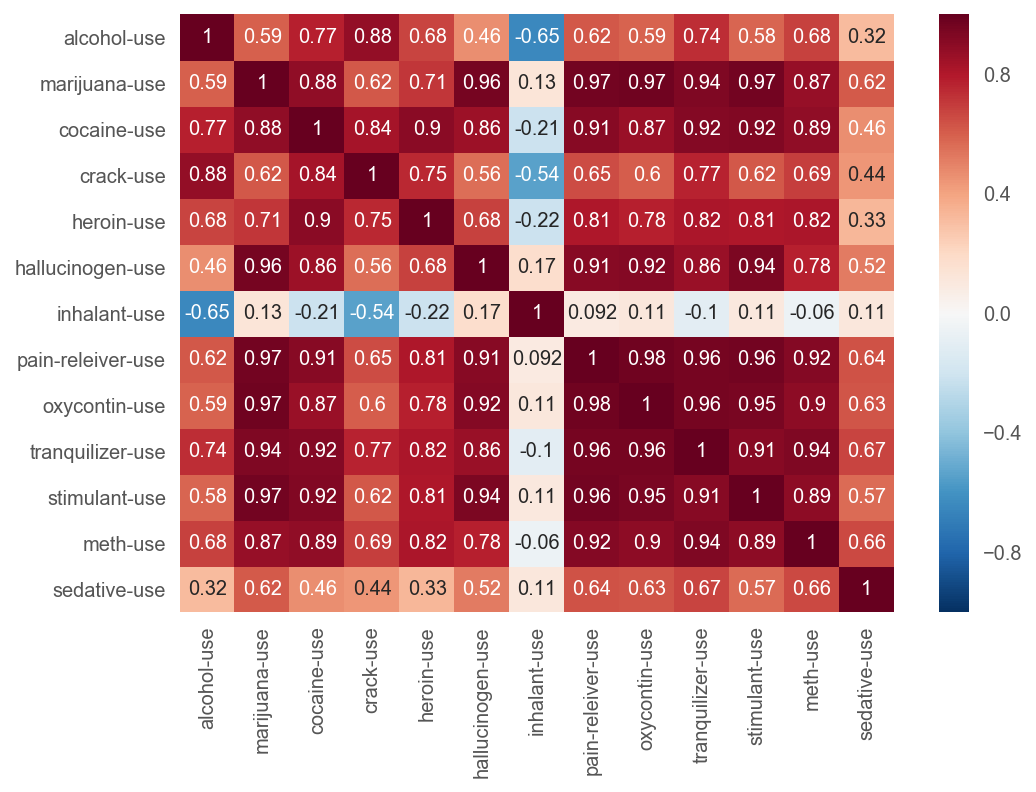

In [68]:
drug_use = drug_df[['alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use', 'heroin-use', 'hallucinogen-use','inhalant-use', 'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use','stimulant-use', 'meth-use', 'sedative-use']]
sns.heatmap(drug_use.corr(), annot=True)

- Marijuana, Cocaine  a strong positive correlation to many other drugs
- Alcohol has moderate positive correlation to other drugs
- Inhalant has weak to negative correlation to other drugs 

### Line plot to observe trend of drug use across age groups

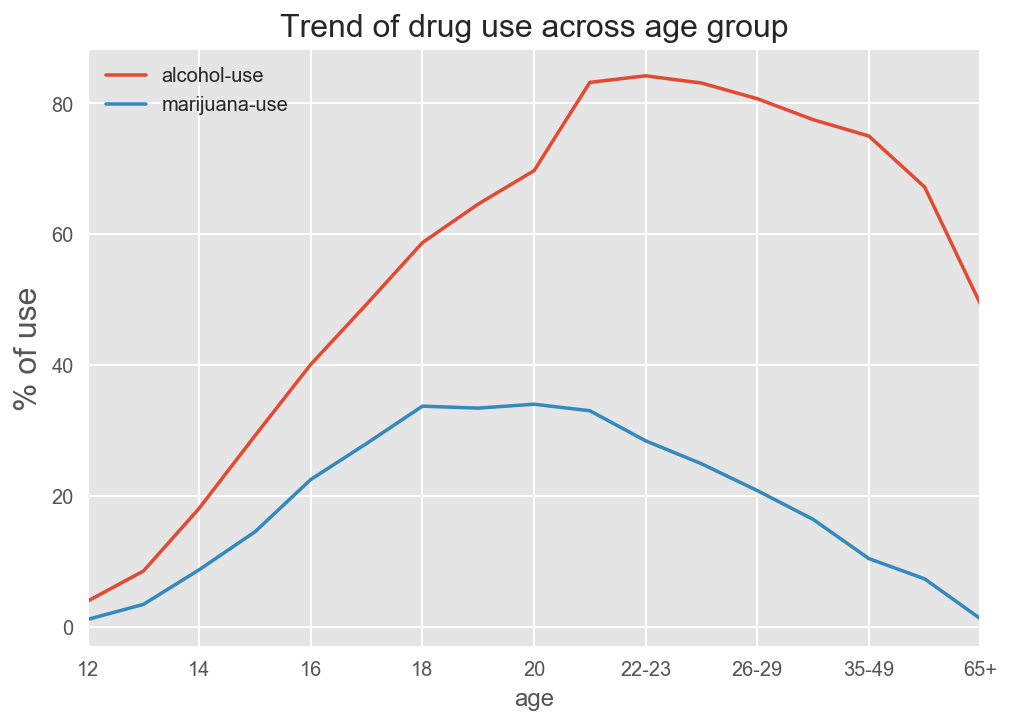

In [71]:
alcohol_marijuana = drug_df[['alcohol-use','marijuana-use']]

am = alcohol_marijuana.plot(x=drug_df['age'])
am.set_ylabel('% of use', fontsize = 16)
am.set_title('Trend of drug use across age group', fontsize = 16)

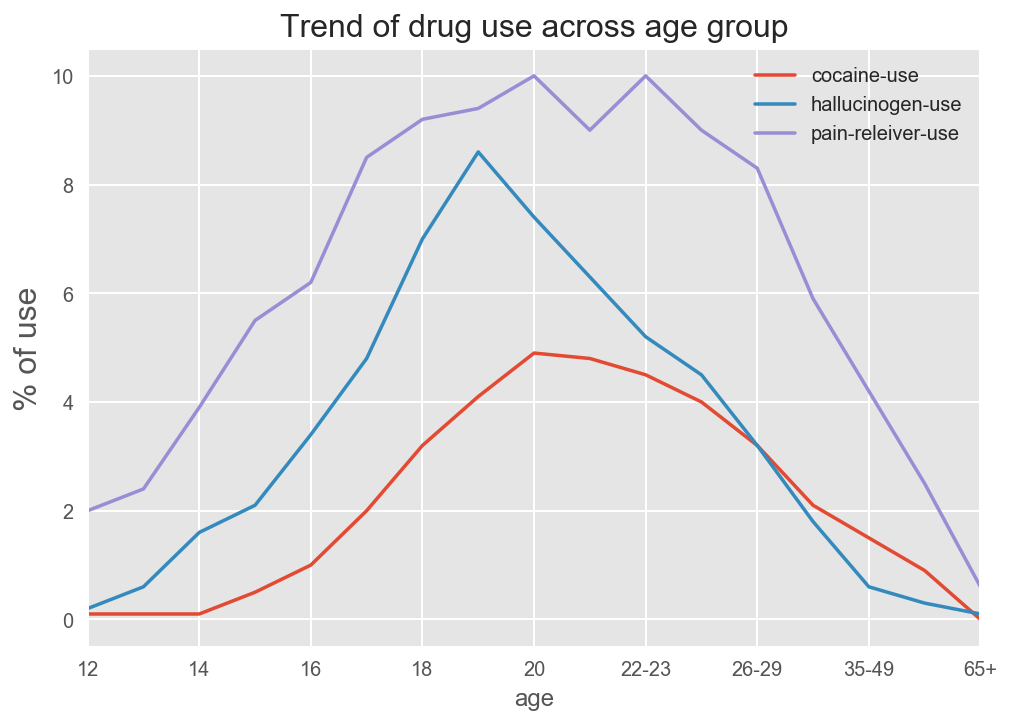

In [72]:
coc_hall_pain = drug_df[['cocaine-use', 'hallucinogen-use', 'pain-releiver-use']]
chp = coc_hall_pain.plot(x=drug_df['age'])

chp.set_ylabel('% of use', fontsize = 16)
chp.set_title('Trend of drug use across age group', fontsize = 16)

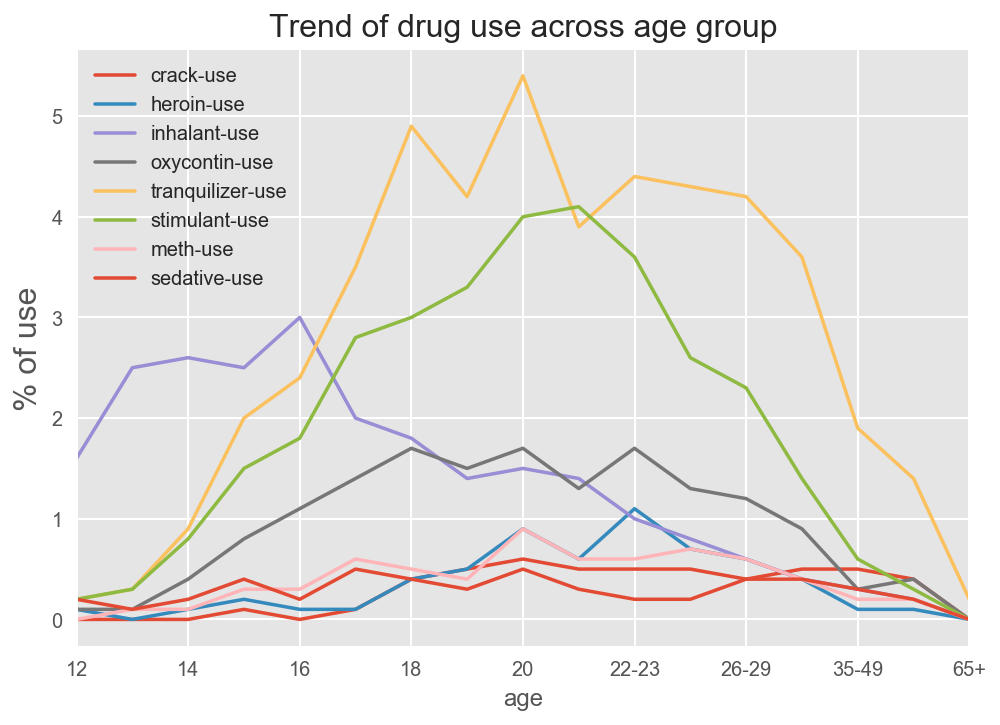

In [73]:
others = drug_df[['crack-use','heroin-use','inhalant-use','oxycontin-use','tranquilizer-use','stimulant-use','meth-use','sedative-use']]
o = others.plot(x=drug_df['age'])

o.set_ylabel('% of use', fontsize = 16)
o.set_title('Trend of drug use across age group', fontsize = 16)

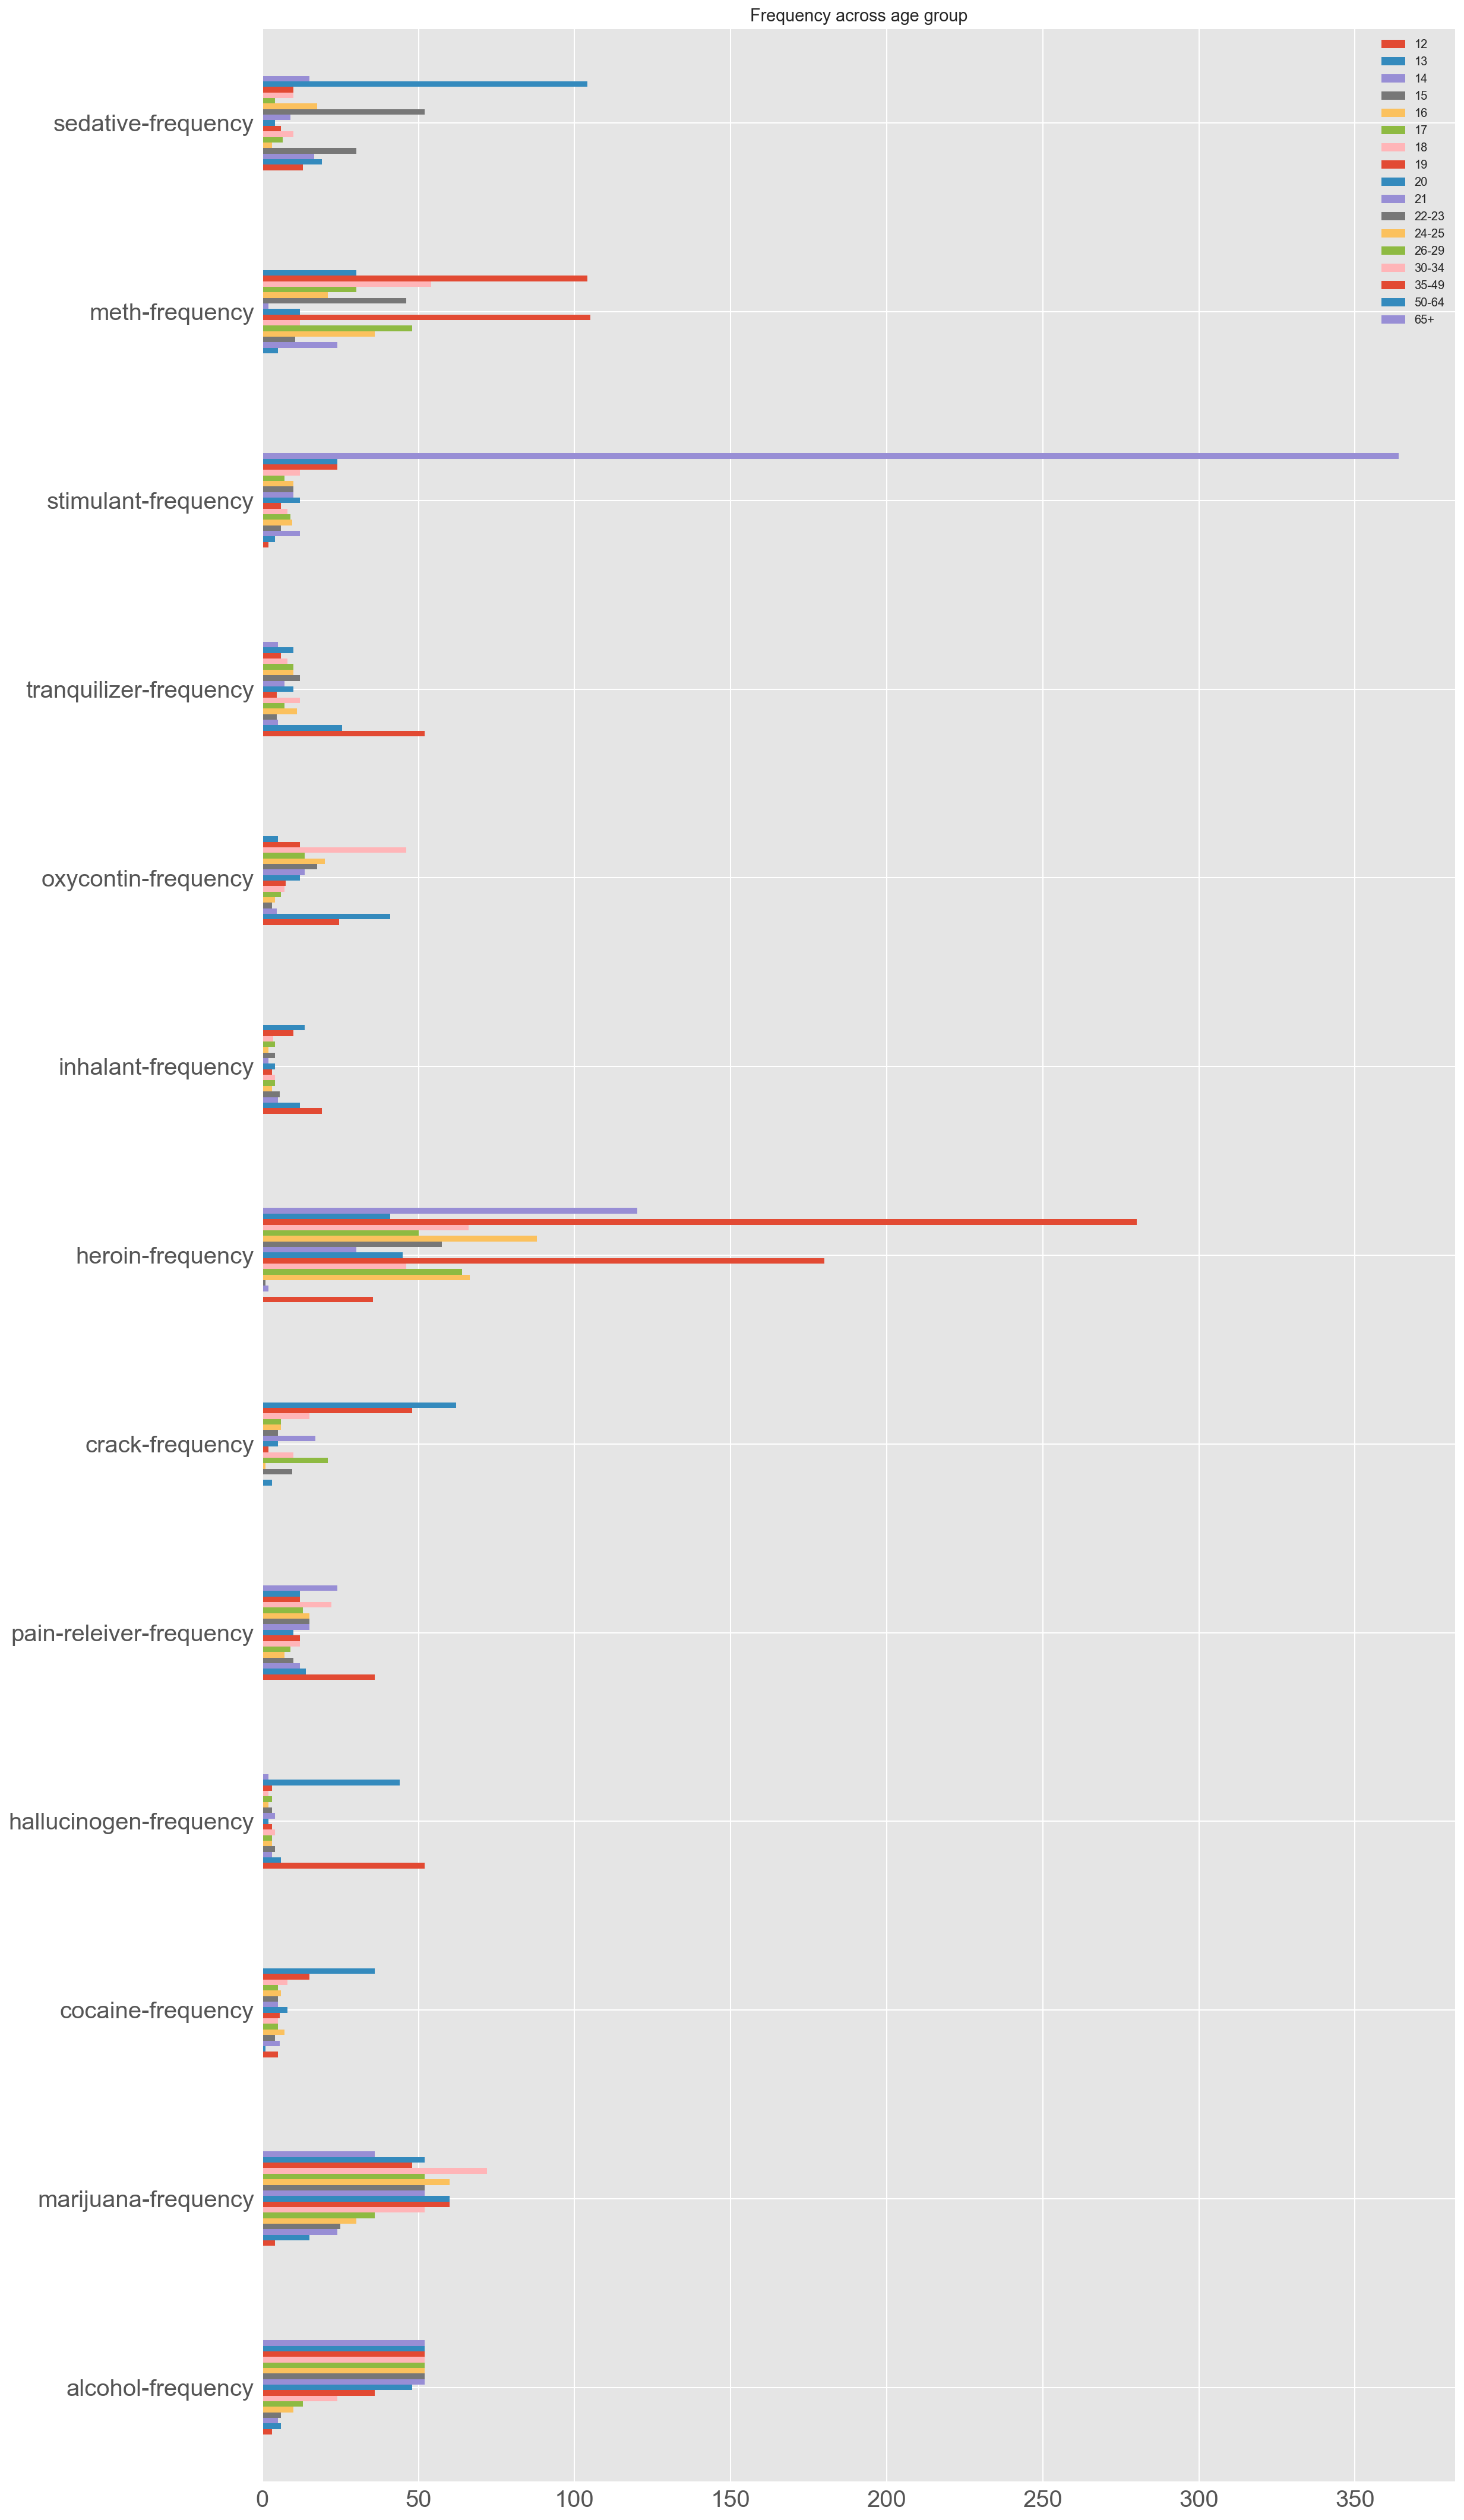

In [93]:
frequency = drug_df[['alcohol-frequency','marijuana-frequency', 'cocaine-frequency', 'hallucinogen-frequency', 'pain-releiver-frequency', 'crack-frequency','heroin-frequency','inhalant-frequency','oxycontin-frequency','tranquilizer-frequency','stimulant-frequency','meth-frequency','sedative-frequency']]
fre = frequency.T.plot(kind='barh', figsize=(18,38), title='Frequency across age group', fontsize= 20)

fre.legend(drug_df['age'])


In [38]:
cocaine = drug_df[['age','cocaine-use','cocaine-frequency']]
crack = drug_df[['age','crack-use','crack-frequency']]
hallucinogen = drug_df[['age','hallucinogen-use','hallucinogen-frequency']]
heroin = drug_df[['age','heroin-use','heroin-frequency']]
stimulant = drug_df[['age','stimulant-use','stimulant-frequency']]
meth = drug_df[['age','meth-use', 'meth-frequency']]
sedative = drug_df[['age','sedative-use', 'sedative-frequency']]

print cocaine
print crack
print hallucinogen
print heroin
print stimulant
print meth
print sedative

      age  cocaine-use  cocaine-frequency
0      12          0.1                5.0
1      13          0.1                1.0
2      14          0.1                5.5
3      15          0.5                4.0
4      16          1.0                7.0
5      17          2.0                5.0
6      18          3.2                5.0
7      19          4.1                5.5
8      20          4.9                8.0
9      21          4.8                5.0
10  22-23          4.5                5.0
11  24-25          4.0                6.0
12  26-29          3.2                5.0
13  30-34          2.1                8.0
14  35-49          1.5               15.0
15  50-64          0.9               36.0
16    65+          0.0                0.0
      age  crack-use  crack-frequency
0      12        0.0              0.0
1      13        0.0              3.0
2      14        0.0              0.0
3      15        0.1              9.5
4      16        0.0              1.0
5      17       

Heroin, stimulant and sedative has error entries where use = 0 but frequency has a value

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


Which drug is the most addictive?
Tolerance builds quickly for the most addictive drug which require more frequent doses to achieve the same high.

Pairplot for each type of drugs by its % use and frequency.

The most addictive drug should see an increasing slope along the scatterplot.



                   alcohol-use  alcohol-frequency
alcohol-use           1.000000           0.897889
alcohol-frequency     0.897889           1.000000
                     marijuana-use  marijuana-frequency
marijuana-use              1.00000              0.61561
marijuana-frequency        0.61561              1.00000


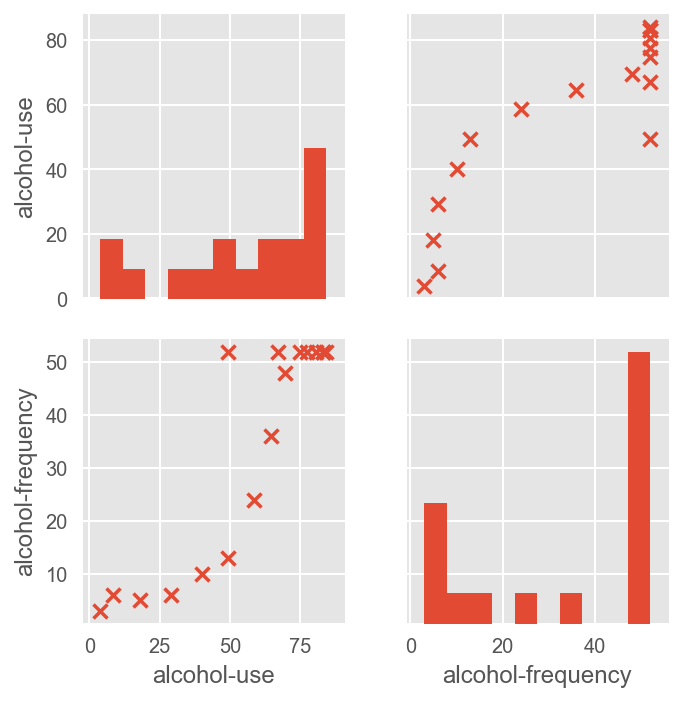

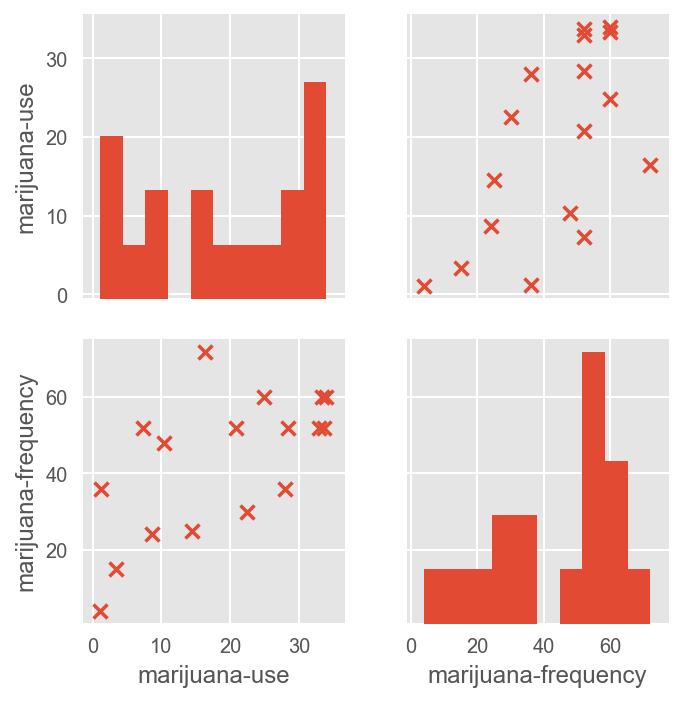

In [41]:
# Code
alcohol = drug_df[['alcohol-use','alcohol-frequency']]
print alcohol.corr()
sns.pairplot(alcohol,markers='x')

marijuana = drug_df[['marijuana-use','marijuana-frequency']]
print marijuana.corr()
sns.pairplot(marijuana,markers='x')


                   cocaine-use  cocaine-frequency
cocaine-use           1.000000          -0.077848
cocaine-frequency    -0.077848           1.000000
                 crack-use  crack-frequency
crack-use          1.00000          0.33344
crack-frequency    0.33344          1.00000


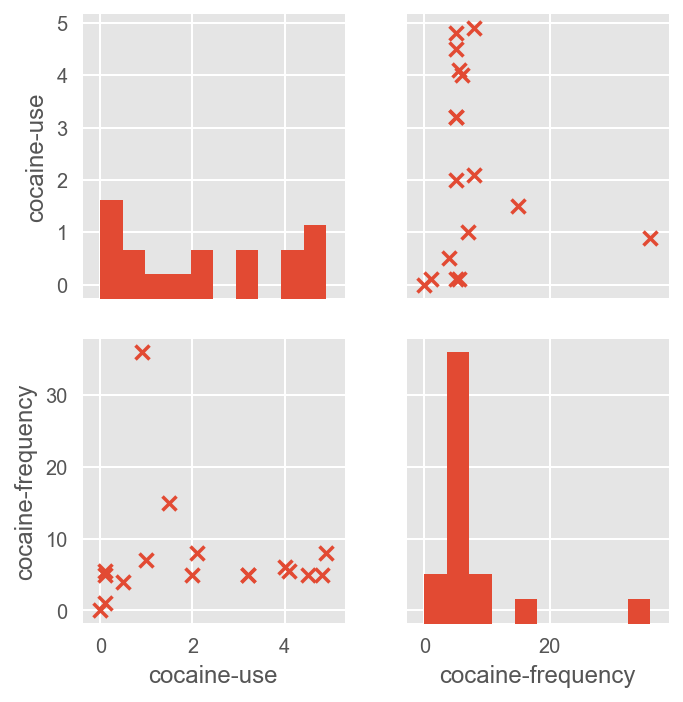

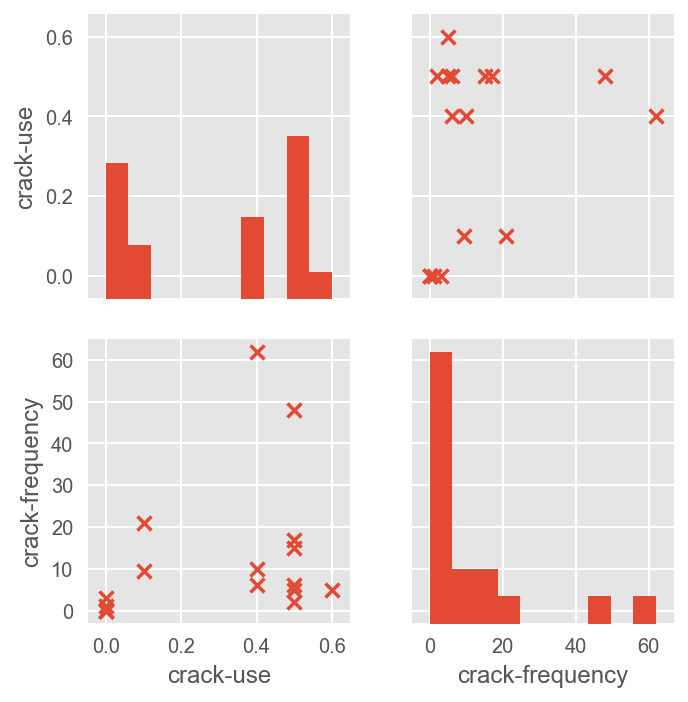

In [42]:
cocaine = drug_df[['cocaine-use','cocaine-frequency']]
print cocaine.corr()
sns.pairplot(cocaine,markers='x')

crack = drug_df[['crack-use','crack-frequency']]
print crack.corr()
sns.pairplot(crack,markers='x')

                  heroin-use  heroin-frequency
heroin-use          1.000000         -0.044239
heroin-frequency   -0.044239          1.000000
                        hallucinogen-use  hallucinogen-frequency
hallucinogen-use                1.000000               -0.427863
hallucinogen-frequency         -0.427863                1.000000


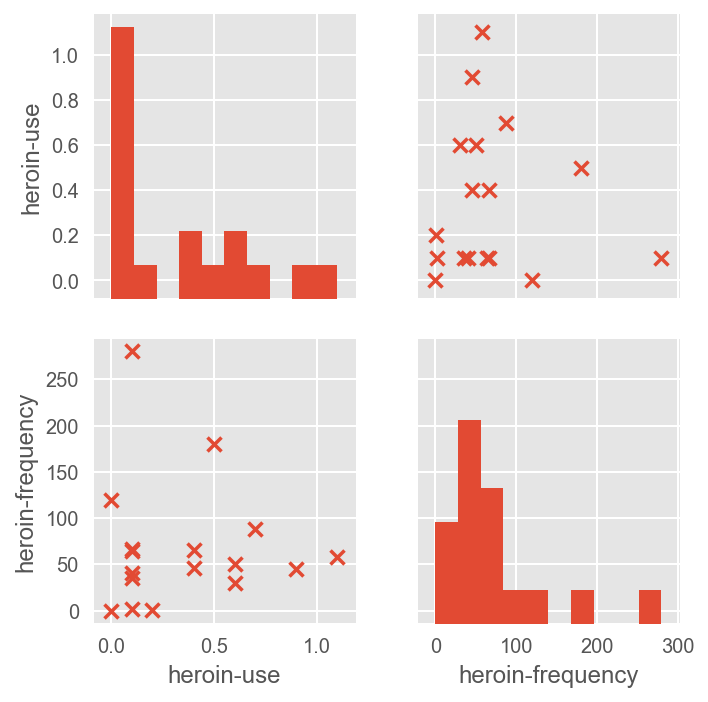

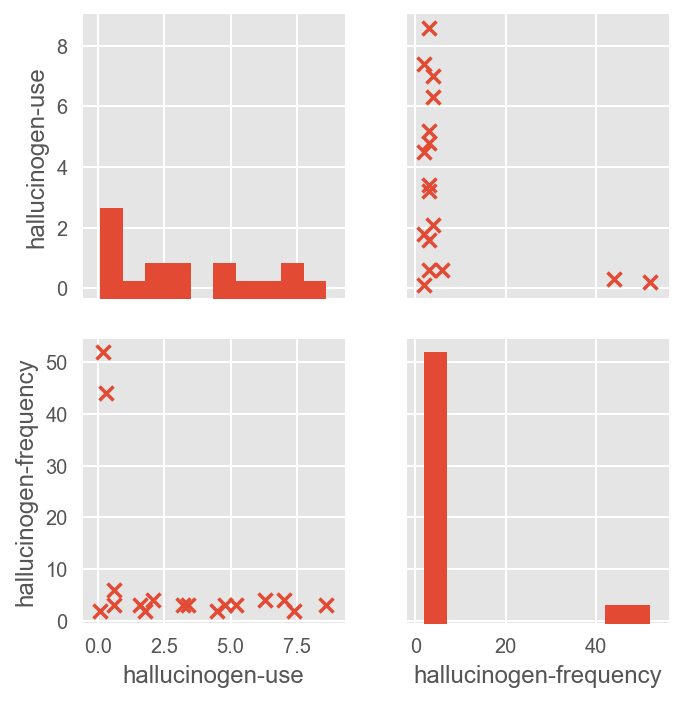

In [43]:
heroin = drug_df[['heroin-use','heroin-frequency']]
print heroin.corr()
sns.pairplot(heroin,markers='x')

hallucinogen = drug_df[['hallucinogen-use','hallucinogen-frequency']]
print hallucinogen.corr()
sns.pairplot(hallucinogen,markers='x')

                    inhalant-use  inhalant-frequency
inhalant-use            1.000000            0.036979
inhalant-frequency      0.036979            1.000000
                         pain-releiver-use  pain-releiver-frequency
pain-releiver-use                 1.000000                -0.468617
pain-releiver-frequency          -0.468617                 1.000000
                     oxycontin-use  oxycontin-frequency
oxycontin-use             1.000000            -0.143877
oxycontin-frequency      -0.143877             1.000000
                        tranquilizer-use  tranquilizer-frequency
tranquilizer-use                1.000000               -0.388954
tranquilizer-frequency         -0.388954                1.000000
                     stimulant-use  stimulant-frequency
stimulant-use             1.000000            -0.363358
stimulant-frequency      -0.363358             1.000000
                meth-use  meth-frequency
meth-use        1.000000        0.059605
meth-frequency  0.059605

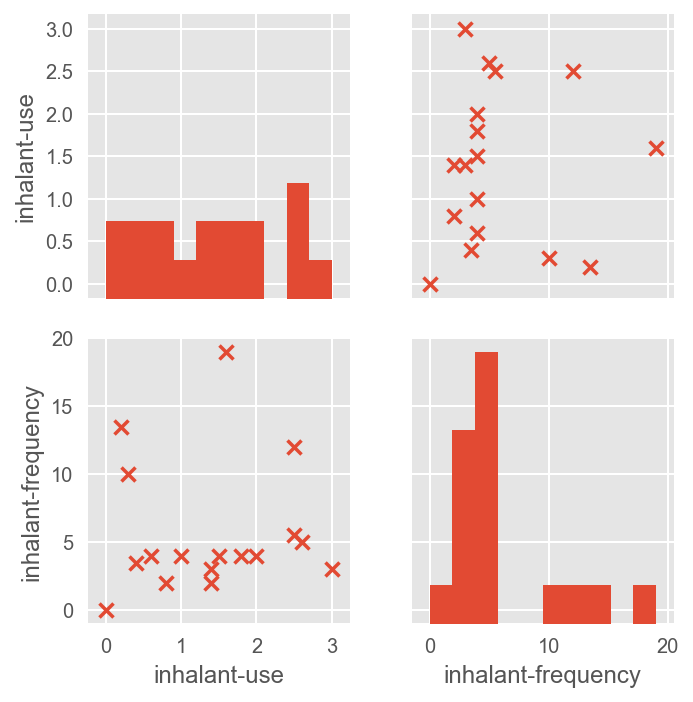

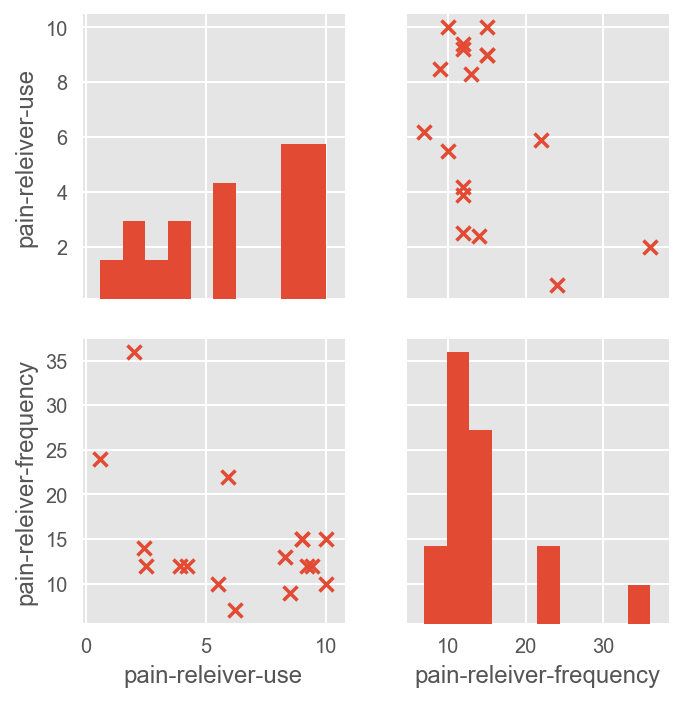

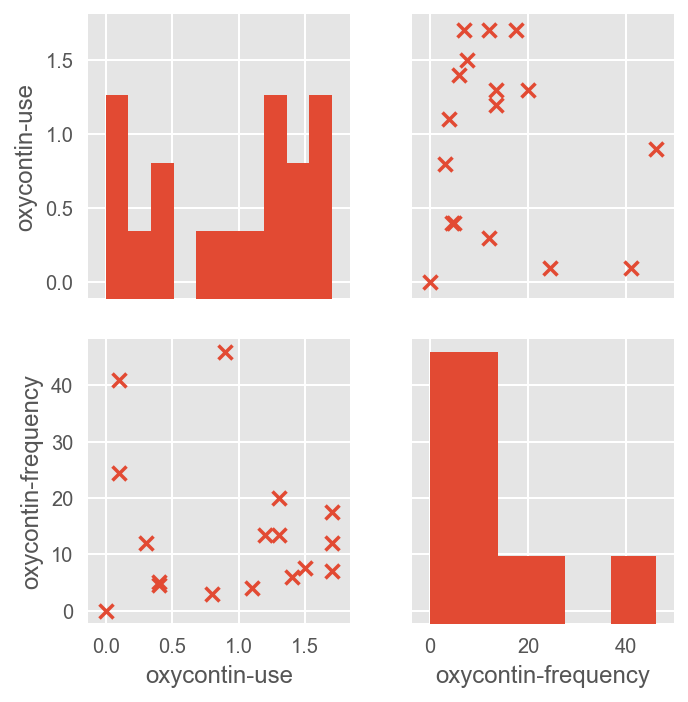

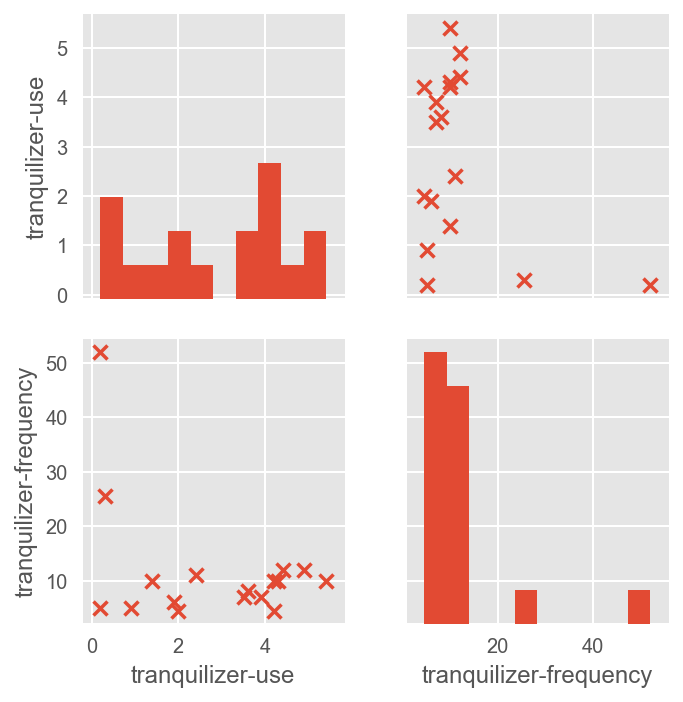

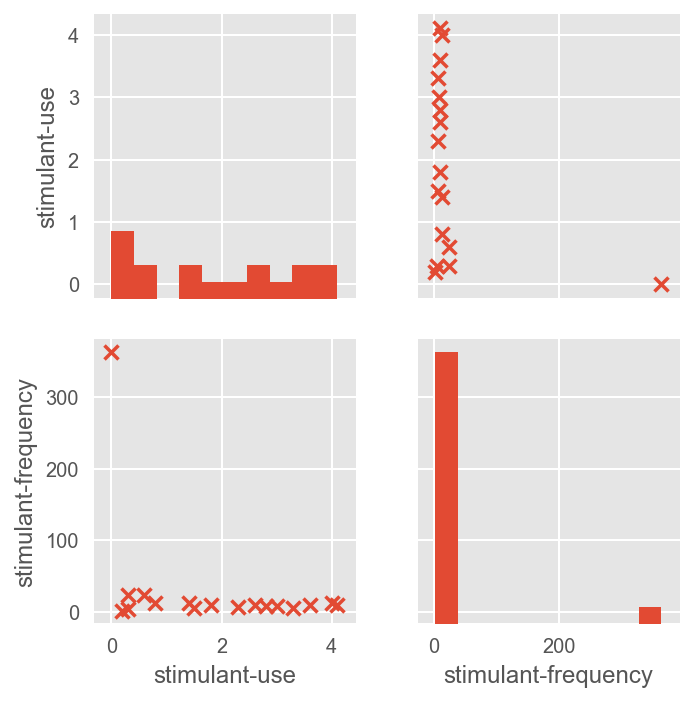

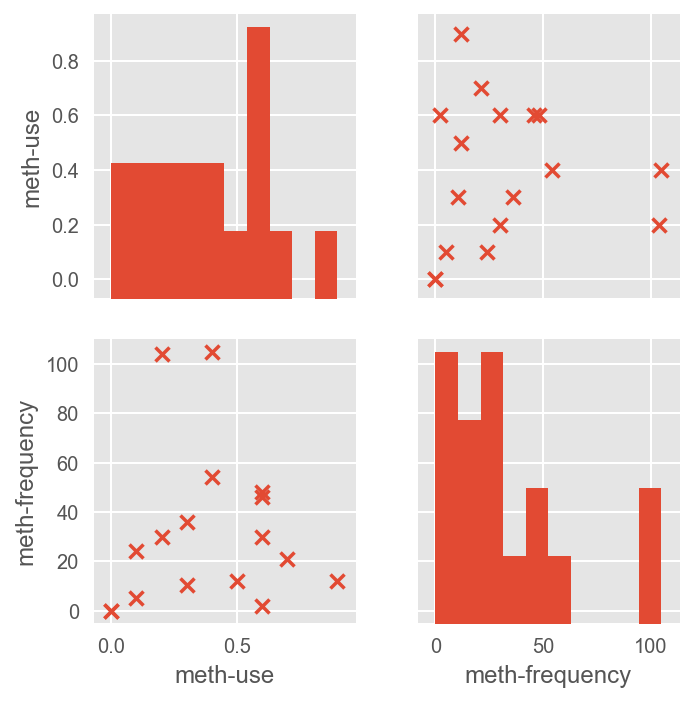

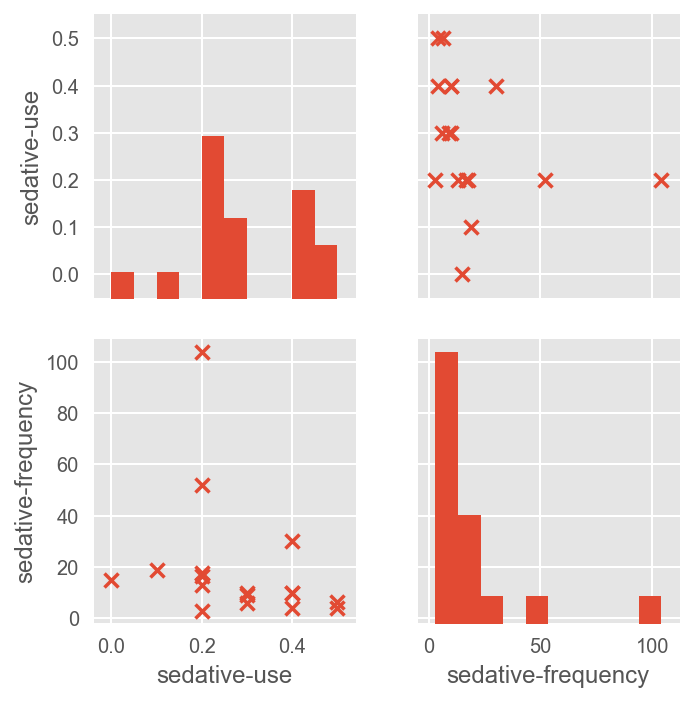

In [44]:
inhalant = drug_df[['inhalant-use','inhalant-frequency']]
print inhalant.corr()
sns.pairplot(inhalant,markers='x')

pain_releiver = drug_df[['pain-releiver-use','pain-releiver-frequency']]
print pain_releiver.corr()
sns.pairplot(pain_releiver,markers='x')

oxycontin = drug_df[['oxycontin-use','oxycontin-frequency']]
print oxycontin.corr()
sns.pairplot(oxycontin,markers='x')

tranquilizer = drug_df[['tranquilizer-use','tranquilizer-frequency']]
print tranquilizer.corr()
sns.pairplot(tranquilizer,markers='x')

stimulant = drug_df[['stimulant-use','stimulant-frequency']]
print stimulant.corr()
sns.pairplot(stimulant,markers='x')

meth = drug_df[['meth-use','meth-frequency']]
print meth.corr()
sns.pairplot(meth,markers='x')

sedative = drug_df[['sedative-use','sedative-frequency']]
print sedative.corr()
sns.pairplot(sedative,markers='x')

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [45]:
rate = pandas_func_satscores[['Rate']]
rate = rate[:-1]
rate.describe()

,Rate
count,51.000000
mean,37.000000
std,27.550681
min,4.000000
25%,9.000000
50%,33.000000
75%,64.000000
max,82.000000


One definition of outlier is any data point more than 1.5 interquartile ranges (IQRs) below the first quartile or above the third quartile.

IQR = 64-9 = 55

In [46]:
np.median(rate)

33.0

In [47]:
np.mean(rate)

Rate    37.0
dtype: float64

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [48]:
verbal_math = drop_all[['Verbal', 'Math']]
stats.spearmanr(verbal_math)

SpearmanrResult(correlation=0.9094125143903472, pvalue=2.6565430361616923e-20)

### How does the spearman correlation compare to the pearson correlation?

The Spearman correlation is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of unrelated variables producing correlation that have a Spearman correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

### Describe clearly in words the process of calculating the spearman rank correlation

1. Create dataset
2.  Rank each set of data (Verbal and Math). Rank 1 will be given to the largest value. 
3. The next stage is to find d (the difference in rank between Verbal and Math). For example, for sample 6 Verbal rank is 5 and the Math rank is 6 so d = 5 – 6 = -1. 
4. The next step is to calculate d² and sum all values of d².
5. Calculate n ³ - n where n is the number of sample
6. 6. r = 1 - (sum of d²/n ³ - n)
7. To see if this r value is significant, a Spearman’s Rank significance table or graph must be used. To do this you need to calculate the degrees of freedom by using the sum n - 2.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [49]:
drop_all['Rate_percentile'] = [stats.percentileofscore(drop_all['Rate'], a, 'rank') for a in drop_all['Rate']]
new_set = drop_all.set_index('State', inplace=False)
print new_set.loc['CA']

Rate                51.000000
Verbal             498.000000
Math               517.000000
Verbal_Math        -19.000000
Rate_percentile     55.882353
Name: CA, dtype: float64


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

1. Two purposes of using percentile in the first place are interpretability and robustness.
    - Interpretability due to standardized rank from 1 - 100
    - Robustness of calculating IQR as a measure of spread which is not affected by outlier unlike using range

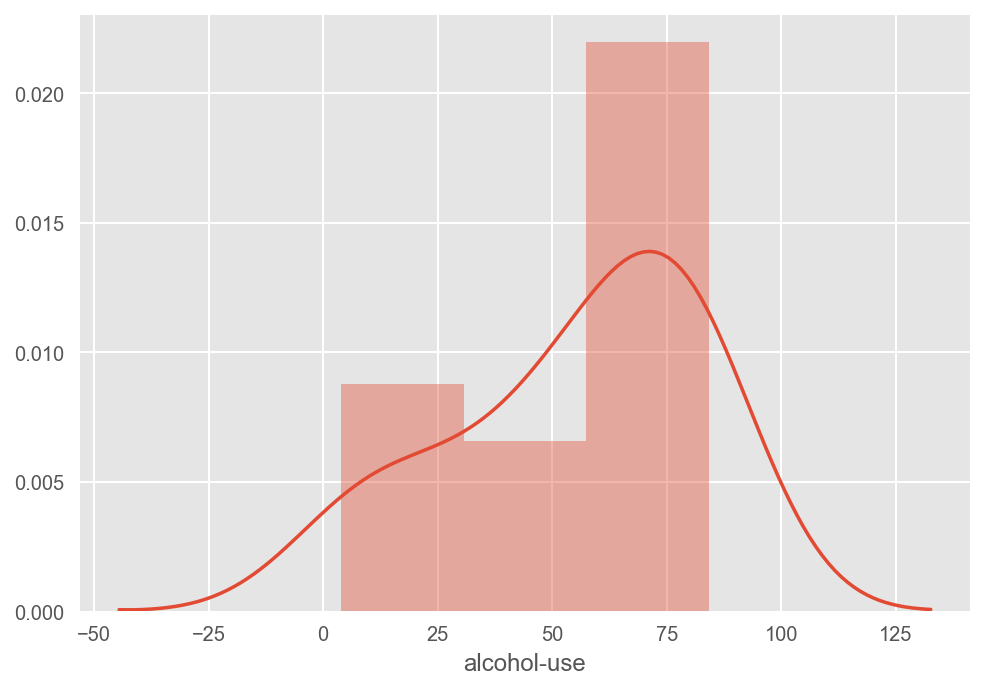

In [50]:
sns.distplot(drug_df['alcohol-use'])

In [51]:
alcohol_percentile = pd.DataFrame([stats.percentileofscore(drug_df['alcohol-use'], a, 'rank') for a in drug_df['alcohol-use']])


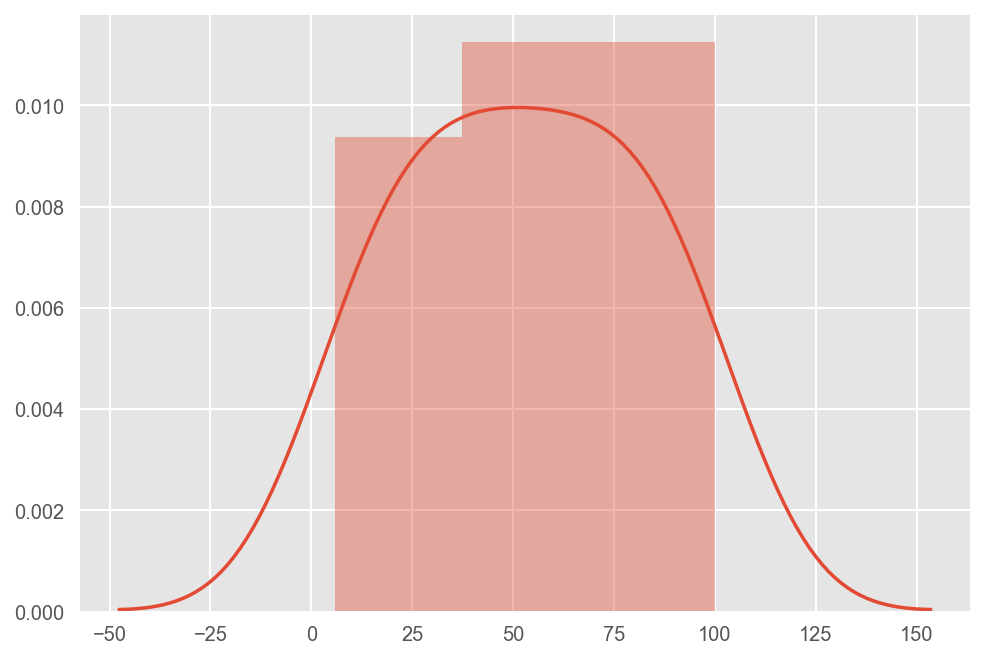

In [52]:
sns.distplot(alcohol_percentile)